<center>
    COMP4600/5500 - Reinforcement Learning

# Homework 3 - Dynamic Programming

### Due: Monday, October 4th 11:59 pm
    
</center>

Student Name: Kevin Lu

The purpose of this project is to study different properties of dynamic programming methods. 

In [1]:
# You are allowed to use the following modules
import numpy as np
import matplotlib.pyplot as plt

## Part I
Consider a cleaning robot that must collect an empty can and also has to recharge its batteries.
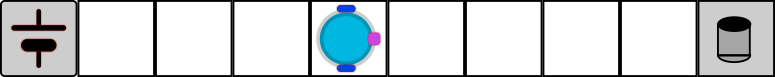

This problem has a discrete state space $S=\{0,…,9\}$, where state $s$ describes the position of the robot in the corridor. The robot has only two actions $A=\{-1,1\}$ for going one step to the left or right. States $0$ and $9$ are terminal, meaning that once the robot reaches either of them it can no longer leave, regardless of the action, and the episode ends. We assume this is a deterministic environment with $\gamma=0.9$.



### I.1 
Write a function that describes the transition function $s'=T(s,a)$ and test it for a few state-action pairs including terminal states. Note that the transition function describes robot’s environment model and should not allow the robot to move outside the environment.


In [2]:
#takes in the current state and action and returns the next state
def transition(s, a):
    #dictionary which gives the possible values for a given state
    actions = {
    0: (0,), 
    1: (-1, 1),    
    2: (-1, 1),
    3: (-1, 1),
    4:(-1, 1),
    5:(-1, 1),
    6:(-1, 1),
    7:(-1, 1),
    8:(-1, 1),
    9:(0,),    
    }
    
    if s in actions.keys() and a in actions.get(s):
        #if state is 0 or 9 it is terminal 
        if s == 0 or s == 9:
            return s
        
        #if action is left then state goes to the left
        elif a == -1:
            s -= 1
            return s
        
        #if action is right then state goes to the right
        elif a == 1:
            s += 1
            return s

In [3]:
#testing different values
print(transition(0,0))
print(transition(1,0))
print(transition(1,-1))
print(transition(3,1))
print(transition(7,-1))
print(transition(-4,-2))

0
None
0
4
6
None


### I.2
Write a function that gives a reward of $+5$ for being at $s=8$ and taking action $a=1$ ; a reward $+1$ for at $s=1$ and taking action $a=-1$ ; and reward $0$ otherwise.



In [4]:
#takes in current state and action and returns the reward value
def reward(s, a):
    if s == 8 and a == 1:
        return 5
    elif s == 1 and a == -1:
        return 1
    else:
        return 0

### I.3
Implement the value iteration algorithm to find $V^*(s)$ and $π^*(s)$. Note that instead of using the dynamics of the environment, $p(s',r|s,a)$, you should use the deterministic transition function $T(s,a)$ that allows you to remove looping over possible rewards and the probability of transitions (because it is a deterministic function). Print out the final $V^*(s)$ and $π^*(s)$.


In [5]:
#storing the nonterminal states and corresponding values
def get_actions():
    actions = {
    1: (-1, 1),    
    2: (-1, 1),
    3: (-1, 1),
    4:(-1, 1),
    5:(-1, 1),
    6:(-1, 1),
    7:(-1, 1),
    8:(-1, 1),    
    }
    
    return actions

In [6]:
#bellman equation function
def bellman(v, new_v, p, actions, s, gamma):
    
    v_test = np.zeros(len(actions.get(s)))
    p_test = np.zeros(len(actions.get(s)))
    
    i = 0
    #iterates through each possible action
    for action in actions.get(s):
        next_s = transition(s,action)
        v_test[i] = reward(s,action) + gamma * v[next_s]
        p_test[i] = action
        i += 1
        
        #tests to make sure no index out of bound error
        if i == len(actions.get(s)):
            break
    
    #takes the best value after testing each possible action
    new_v[s] = np.amax(v_test)
    #takes the best policy based on the best value
    p[s] = p_test[np.argmax(v_test)]
    
    return new_v[s], p[s]

In [7]:
#value iteration function
def value_iteration():
    
    theta = 1e-9
    gamma = 0.9
    v = np.zeros(10)
    new_v = np.zeros(10)
    p = np.zeros(10)
    
    actions = get_actions()
    
    while True:
        
        delta = 0
        #storing the previous values for the new_v which will be used to compare later
        v = new_v.copy()
        
        #iterates through each state
        for s in actions.keys():

            new_v[s], p[s] = bellman(v, new_v, p, actions, s, gamma)
            
            #obtains the highest delta value after taking the difference of the previous v and new v
            delta = np.maximum(delta, np.abs(new_v[s] - v[s]))
      
        #once this condition has been met then v is the deterministic policy   
        if delta < theta:
            return v,p

In [8]:
v,pi = value_iteration()
print('v: ',v)
print('pi: ',pi)

v:  [0.        2.3914845 2.657205  2.95245   3.2805    3.645     4.05
 4.5       5.        0.       ]
pi:  [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


<hr>

## Part II (*)
A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many dollars as he has staked on that flip; if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of \$100, or loses by running out of money. 

On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. This problem can be formulated as an **undiscounted** ($\gamma=1$), **episodic**, finite MDP.

The state is the gambler’s capital $s \in \{ 1,2,...,99\}$ and the actions are stakes $a \in \{ 0,1,..., min(s, 100-s)\}$. The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1. 
The state-value function then gives the probability of winning from each state. 

A policy is mapping from levels of capital to stakes. The optimal policy maximizes the probability of reaching the goal. 
Let p_h denote the probability of the coin coming up heads. If $p_h$ is known the problem can be solved using value iteration.



### II.1
Implement the Gambler’s problem and then implement **value iteration** to solve the MDP for three scenarios where $p_h=\{0.4,0.25,0.55\}$ and find the optimal value function and optimal policy for each scenario.

**Tip**: When implementing, you might find it convenient to introduce two dummy states corresponding to termination with capital of 0 and 100, giving them values of 0 and 1 respectively.

In [9]:
def gp_setup():
    
    all_states = np.array(range(100))
    states = np.array(range(99))
    
    for s in states:
        states[s] = s+1
    
    actions = np.zeros((100,51),dtype = int)
    
    for s in states:
        
        for i in range(0, np.minimum(s,100-s)+1):
    
            actions[s][i] = i
        
        if s > len(states):
            break
    
    actions = np.delete(actions,0,0)
    
    temp = []
    
    for a in actions:
        for i,aa in enumerate(a):
            if aa == 0 and i != 0:
                temp.append(a[:i])
                break
            elif i == len(a)-1:
                temp.append(a)
    

    state_actions = dict(zip(states,temp))
    
    return state_actions   

In [10]:
def gp_rewards(s, a):

    if s+a == 100:
       
        return 1
   
    else:
        return 0

In [11]:
def gp_policy(eq_v,ph):
    
    gamma = 1
    pt = 1 - ph
    state_actions = gp_setup()
    pi = np.zeros(100)
    
    for s in state_actions.keys():
        
        total = np.zeros(101)
        
        for a in range(1,min(s,100-s) + 1):
            reward = gp_rewards(s,a)
            heads = ph * (reward + gamma * eq_v[s+a])
            tails = pt * (0 + gamma * eq_v[s-a])
            total[a] = heads + tails
        
        max_p = np.argmax(total)        
        pi[s] = max_p
    
    return pi

In [12]:
def gambler_problem1(ph):
    
    gamma = 1
    pt = 1 - ph
    v = np.zeros(101)
    new_v = np.zeros(101)
    v_iteration = np.zeros((101,101))
    
    state_actions = gp_setup()
    
    for i in range(100):
        
        #storing the previous values for the new_v which will be used to compare later
        v = new_v.copy()
        
        #iterates through each state
        for s in state_actions.keys():
            temp = []
            total = np.zeros(101)
            for a in range(1,min(s,100-s) + 1):
                reward = gp_rewards(s,a)
                heads = ph * (reward + gamma * v[s+a])
                tails = pt * (0 + gamma * v[s-a])
                total[a] = heads + tails
            
            max_v = np.amax(total)
            new_v[s] = max_v
        
        v_iteration[i] = new_v
    return v_iteration 

In [13]:
def gambler_problem2(ph):
    
    gamma = 1
    pt = 1 - ph
    v = np.zeros(101)
    new_v = np.zeros(101)
    
    state_actions = gp_setup()
    
    for i in range(100):
        
        #storing the previous values for the new_v which will be used to compare later
        v = new_v.copy()
        
        #iterates through each state
        for s in state_actions.keys():
            temp = []
            total = np.zeros(101)
            for a in range(1,min(s,100-s) + 1):
                reward = gp_rewards(s,a)
                heads = ph * (reward + gamma * v[s+a])
                tails = pt * (0 + gamma * v[s-a])
                total[a] = heads + tails
            
            max_v = np.amax(total)
            new_v[s] = max_v
    
    return v

In [14]:
v = gambler_problem2(0.4)
print(v)
pi = gp_policy(v,0.4)
print(pi)

[0.         0.00206562 0.00516406 0.00922547 0.01291015 0.0173854
 0.02306368 0.02781411 0.03227539 0.03768507 0.0434635  0.05035447
 0.05765919 0.06523937 0.06953528 0.07443124 0.08068847 0.08661104
 0.09421268 0.10314362 0.10865874 0.11596663 0.12588617 0.13357998
 0.14414799 0.16       0.16309844 0.16774609 0.17383821 0.17936523
 0.1860781  0.19459552 0.20172117 0.20841308 0.21652761 0.22519525
 0.2355317  0.24648879 0.25785906 0.26430292 0.27164686 0.2810327
 0.28991657 0.30131902 0.31471544 0.32298812 0.33394994 0.34882926
 0.36036996 0.37622198 0.4        0.40309844 0.40774609 0.41383821
 0.41936523 0.4260781  0.43459552 0.44172117 0.44841308 0.45652761
 0.46519525 0.4755317  0.48648879 0.49785906 0.50430292 0.51164686
 0.5210327  0.52991657 0.54131902 0.55471544 0.56298812 0.57394994
 0.58882926 0.60036996 0.61622198 0.64       0.64464766 0.65161914
 0.66075731 0.66904785 0.67911715 0.69189327 0.70258175 0.71261962
 0.72479141 0.73779287 0.75329756 0.76973319 0.78678859 0.796454

In [15]:
v = gambler_problem2(0.25)
print(v)
pi = gp_policy(v,0.25)
print(pi)

[0.00000000e+00 7.28611683e-05 2.91444673e-04 6.95264571e-04
 1.16577869e-03 1.77125506e-03 2.78105828e-03 4.03661211e-03
 4.66311477e-03 5.60141644e-03 7.08502024e-03 9.04088770e-03
 1.11242331e-02 1.56796459e-02 1.61464484e-02 1.69534413e-02
 1.86524591e-02 1.98260623e-02 2.24056658e-02 2.73847344e-02
 2.83400810e-02 3.04945467e-02 3.61635508e-02 3.84959101e-02
 4.44969325e-02 6.25000000e-02 6.27185835e-02 6.33743340e-02
 6.45857937e-02 6.59973361e-02 6.78137652e-02 7.08431749e-02
 7.46098363e-02 7.64893443e-02 7.93042493e-02 8.37550607e-02
 8.96226631e-02 9.58726994e-02 1.09538938e-01 1.10939345e-01
 1.13360324e-01 1.18457377e-01 1.21978187e-01 1.29716997e-01
 1.44654203e-01 1.47520243e-01 1.53983640e-01 1.70990652e-01
 1.77987730e-01 1.95990798e-01 2.50000000e-01 2.50218584e-01
 2.50874334e-01 2.52085794e-01 2.53497336e-01 2.55313765e-01
 2.58343175e-01 2.62109836e-01 2.63989344e-01 2.66804249e-01
 2.71255061e-01 2.77122663e-01 2.83372699e-01 2.97038938e-01
 2.98439345e-01 3.008603

In [16]:
v = gambler_problem2(0.55)
print(v)
pi = gp_policy(v,0.55)
print(pi)

[0.         0.06699362 0.12257224 0.16944162 0.20967416 0.24489064
 0.27630035 0.3048438  0.33123482 0.35596207 0.37914774 0.40106648
 0.42170243 0.44130963 0.45997082 0.47782172 0.4948659  0.51116955
 0.52691232 0.54206739 0.55668468 0.57076062 0.58428338 0.59734776
 0.61002501 0.62232124 0.63424503 0.64577778 0.65692105 0.66771634
 0.67821729 0.68847547 0.69846881 0.7081843  0.71760917 0.72674254
 0.73560674 0.74424626 0.75269549 0.76095892 0.76902216 0.776865
 0.7844742  0.79185579 0.79903823 0.80605539 0.81292975 0.81966245
 0.82623938 0.83264002 0.8388528  0.8448834  0.85075277 0.85648728
 0.8621059  0.86761014 0.87298747 0.87822105 0.88330088 0.88822933
 0.89302198 0.89770114 0.90228059 0.90675916 0.91112824 0.91537429
 0.91949063 0.92347989 0.92735939 0.93114356 0.9348358  0.93843515
 0.94193145 0.94531593 0.94858862 0.95175932 0.9548415  0.95783624
 0.96073483 0.96353506 0.96623131 0.96882507 0.97133525 0.97375723
 0.97608577 0.97832535 0.98046642 0.98251717 0.98447758 0.986340

### II.2
For all three scenarios:
1. Plot the change in the value function over successive sweeps of value iteration w.r.t capital (state).
2. Plot the final policy w.r.t capital (state). 



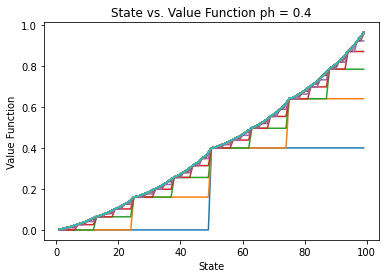

In [17]:
vi = gambler_problem1(0.4)
state_actions = gp_setup()
for i in range(100):
    plt.plot(state_actions.keys(),vi[i,1:100])

plt.xlabel("State")
plt.ylabel("Value Function")
plt.title("State vs. Value Function ph = 0.4")
plt.show()

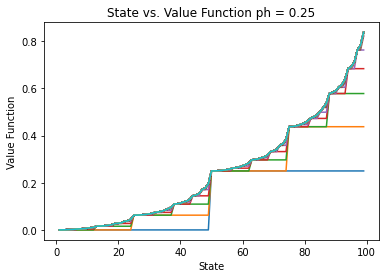

In [18]:
vi = gambler_problem1(0.25)
state_actions = gp_setup()
for i in range(100):
    plt.plot(state_actions.keys(),vi[i,1:100])

plt.xlabel("State")
plt.ylabel("Value Function")
plt.title("State vs. Value Function ph = 0.25")    
plt.show()

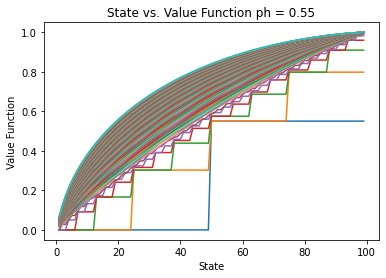

In [19]:
vi = gambler_problem1(0.55)
state_actions = gp_setup()
for i in range(100):
    plt.plot(state_actions.keys(),vi[i,1:100])

plt.xlabel("State")
plt.ylabel("Value Function")
plt.title("State vs. Value Function ph = 0.55")    
plt.show()

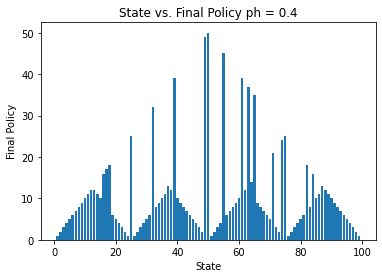

In [23]:
v_1 = gambler_problem2(0.4)
pi_1 = gp_policy(v_1,0.4)
state_actions = gp_setup()

plt.bar(state_actions.keys(),pi_1[1:100])
plt.xlabel("State")
plt.ylabel("Final Policy")
plt.title("State vs. Final Policy ph = 0.4")
plt.show()

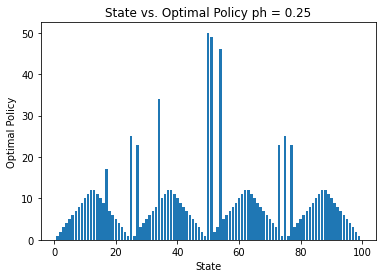

In [24]:
v_2 = gambler_problem2(0.25)
pi_2 = gp_policy(v_2,0.25)
state_actions = gp_setup()

plt.bar(state_actions.keys(),pi_2[1:100])
plt.xlabel("State")
plt.ylabel("Optimal Policy")
plt.title("State vs. Optimal Policy ph = 0.25")
plt.show()

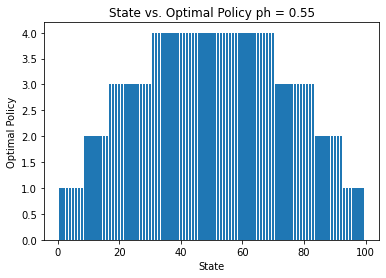

In [25]:
v_3 = gambler_problem2(0.55)
pi_3 = gp_policy(v_3,0.55)
state_actions = gp_setup()

plt.bar(state_actions.keys(),pi_3[1:100])
plt.xlabel("State")
plt.ylabel("Optimal Policy")
plt.title("State vs. Optimal Policy ph = 0.55")
plt.show()

### II.3
Answer the following questions:
1. What action does your optimal policy suggest for capital of 50? What about for capital of 51?
> Answer: <br> 0.4: 50 for capital 50, 1 for capital 51 <br>
  <br> 0.25: 50 for capital 50, 49 for capital 51 <br>
  <br>   0.55: 4 for capital 50, 4 for capital 51 <br>

2. Why do you think your optimal policy is a good policy? Explain.
> Answer:
This is a good policy because the betting depends on how close you are to getting to 100 from current state. Since we are looking at gamma = 1 which means that we are looking far into the future we want to try to obtain best chances to get to these states that allow us to best obtain 100. The purpose of betting is to gain capital and these policies give the best ways to get to 100. 


## Part III (extra credit)
Test the algorithm by decreasing $\theta$ the threshold for accuracy of value function estimation. What happens when $\theta \rightarrow 0$? You can add any helpful code/graphs if you have.

> Answer